In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Reading the dataset
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# identify the data types
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
# identify all the nan values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# Display the columns with missing values
df.isna().sum()[df.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# drop the columns with missing values more than 50%
df = df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1)

In [8]:
# Display the columns with missing values
df.isna().sum()[df.isna().sum() > 0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [9]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [10]:
# display the catergorical columns with missing values
df.select_dtypes('object').isna().sum()[df.select_dtypes('object').isna().sum() > 0]

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [11]:
# impute the missing values in the categorical columns with the mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
# Display the missing values in the numerical columns
df.select_dtypes(['int64', 'float64']).isna().sum()[df.select_dtypes(['int64', 'float64']).isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [13]:
# impute the missing in the numerical columns with the mean
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [14]:
# show the dtypes of the columns with missing values
df[df.columns[df.isnull().sum() > 0]].dtypes

Series([], dtype: object)

In [15]:
# identify the unique values for all the columns
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 75, dtype: int64

In [16]:
# encode the ExterQual with 0,1,2,3 and 4
df['ExterQual'] = df['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})


In [17]:
# encode the ExterCond with 0,1,2,3 and 4
df['ExterCond'] = df['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [18]:
# encode the BsmtQual with 0,1,2,3,4 and 5
df['BsmtQual'] = df['BsmtQual'].map({'NA':0 ,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [19]:
# encode the BsmtCond with 0,1,2,3,4 and 5
df['BsmtCond'] = df['BsmtCond'].map({'NA':0 ,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [20]:
# encode BsmtExposure with 0,1,2,3,4 and 5
df['BsmtExposure'] = df['BsmtExposure'].map({'NA':0 ,'No':1, 'Mn':2, 'Av':3, 'Gd':4})

In [21]:
# encode BsmtFinType1 with 0,1,2,3,4,5 and 6
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0 ,'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [22]:
# encode HeatingQC with 0,1,2,3,4 and 5
df['HeatingQC'] = df['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [23]:
# encode CentralAir with 0 and 1
df['CentralAir'] = df['CentralAir'].map({'N':0, 'Y':1})

In [24]:
# encode KitchenQual with 0,1,2,3, and 4
df['KitchenQual'] = df['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [25]:
# encode BsmtFinType2 with 0,1,2,3,4,5 and 6
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0 ,'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [26]:
# encode GarageQual with 0,1,2,3,4, and 5
df['GarageQual'] = df['GarageQual'].map({'NA':0 ,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [27]:
# encode GarageCond with 0,1,2,3,4, and 5
df['GarageCond'] = df['GarageCond'].map({'NA':0 ,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

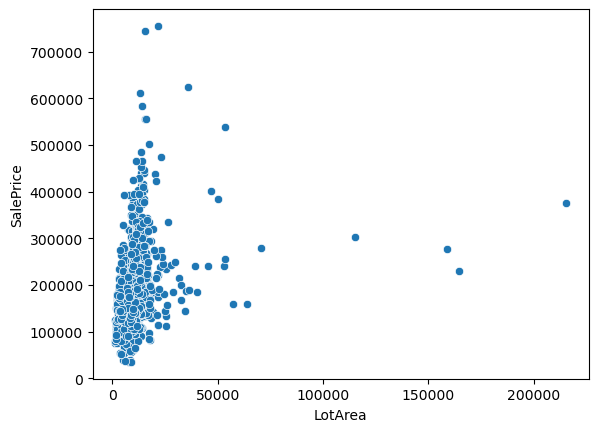

In [28]:
# draw a scatter plot
sns.scatterplot(x='LotArea', y='SalePrice', data=df) # scatter plot of LotArea and SalePrice
plt.show() 

In [29]:
# drop the columns Id and Lotshape
df = df.drop(['Id', 'LotShape'], axis=1)

In [30]:
# drop BsmtExposure
df = df.drop(['BsmtExposure'], axis=1)

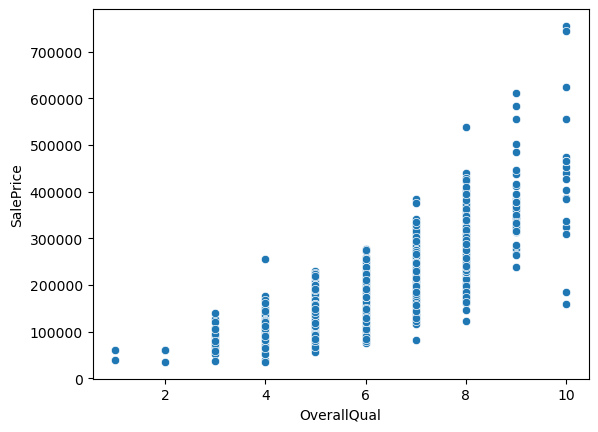

In [31]:
# draw a scatter plot of overallQual and SalePrice
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

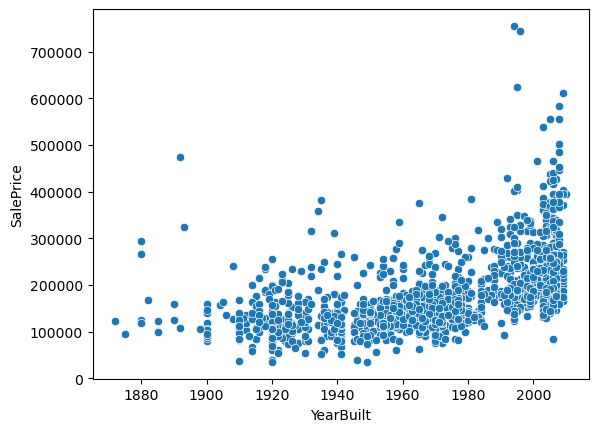

In [32]:
# draw a scatter plot of YearBuilt and SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.show()

In [33]:
# identify the unique values for year built
df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [34]:
# identify the unique values for year sold
df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [35]:
# identify the unique values for all the columns
df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 72, dtype: int64

In [36]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 72, dtype: object

In [37]:
# Assuming df is your original DataFrame
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Normalize the selected numerical columns
df_norm = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

# Display the normalized DataFrame
df_norm.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.073350,-0.229293,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.511243,1.051942,-0.238031,...,-0.751918,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730,0.347154
1,-0.872264,0.451781,-0.091855,-0.071812,2.178881,0.156680,-0.429430,-0.574214,-0.689368,-0.238031,...,1.625638,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228,0.007286
2,0.073350,-0.093078,0.073455,0.651256,-0.517023,0.984415,0.829930,0.322950,1.051942,-0.238031,...,-0.751918,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730,0.535970
3,0.309753,-0.456318,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.574214,-0.689368,-0.238031,...,-0.751918,-0.175988,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186,-0.515105
4,0.073350,0.633401,0.375020,1.374324,-0.517023,0.951306,0.733056,1.364102,1.051942,-0.238031,...,0.779930,0.563567,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730,0.869545


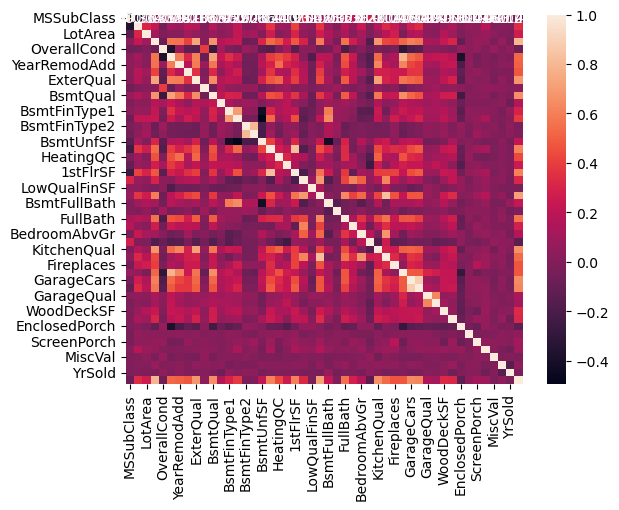

In [38]:
# draw a heatmap
sns.heatmap(df_norm.corr(), annot=True)
plt.show()

In [39]:
# split the data into train and test
X = df_norm.drop('SalePrice', axis=1)
y = df_norm['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# impute all the missing values with mean
X_train = X_train.fillna(X_train.mean()) 
X_test = X_test.fillna(X_test.mean())

In [41]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# impute all the missing values with mean
X_train = X_train.fillna(X_train.mean()) 
X_test = X_test.fillna(X_test.mean())

In [42]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   float64
 1   LotFrontage    1168 non-null   float64
 2   LotArea        1168 non-null   float64
 3   OverallQual    1168 non-null   float64
 4   OverallCond    1168 non-null   float64
 5   YearBuilt      1168 non-null   float64
 6   YearRemodAdd   1168 non-null   float64
 7   MasVnrArea     1168 non-null   float64
 8   ExterQual      1168 non-null   float64
 9   ExterCond      1168 non-null   float64
 10  BsmtQual       1168 non-null   float64
 11  BsmtCond       1168 non-null   float64
 12  BsmtFinType1   1168 non-null   float64
 13  BsmtFinSF1     1168 non-null   float64
 14  BsmtFinType2   1168 non-null   float64
 15  BsmtFinSF2     1168 non-null   float64
 16  BsmtUnfSF      1168 non-null   float64
 17  TotalBsmtSF    1168 non-null   float64
 18  HeatingQC  

In [43]:
# Example of converting categorical variables to numeric (one-hot encoding)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [44]:
# Example of checking for NaNs in individual columns
for col in X_train.columns:
    print(f"Column: {col}, NaN count: {X_train[col].isnull().sum()}")


Column: MSSubClass, NaN count: 0
Column: LotFrontage, NaN count: 0
Column: LotArea, NaN count: 0
Column: OverallQual, NaN count: 0
Column: OverallCond, NaN count: 0
Column: YearBuilt, NaN count: 0
Column: YearRemodAdd, NaN count: 0
Column: MasVnrArea, NaN count: 0
Column: ExterQual, NaN count: 0
Column: ExterCond, NaN count: 0
Column: BsmtQual, NaN count: 0
Column: BsmtCond, NaN count: 0
Column: BsmtFinType1, NaN count: 0
Column: BsmtFinSF1, NaN count: 0
Column: BsmtFinType2, NaN count: 0
Column: BsmtFinSF2, NaN count: 0
Column: BsmtUnfSF, NaN count: 0
Column: TotalBsmtSF, NaN count: 0
Column: HeatingQC, NaN count: 0
Column: CentralAir, NaN count: 0
Column: 1stFlrSF, NaN count: 0
Column: 2ndFlrSF, NaN count: 0
Column: LowQualFinSF, NaN count: 0
Column: GrLivArea, NaN count: 0
Column: BsmtFullBath, NaN count: 0
Column: BsmtHalfBath, NaN count: 0
Column: FullBath, NaN count: 0
Column: HalfBath, NaN count: 0
Column: BedroomAbvGr, NaN count: 0
Column: KitchenAbvGr, NaN count: 0
Column: Kit

In [45]:
from sklearn.linear_model import LinearRegression

# Attempt to fit the model with cleaned data
reg = LinearRegression().fit(X_train, y_train)


In [46]:
X_train_clean = X_train.dropna()
X_test_clean = X_test.dropna()

In [47]:
# what are the NaN values in input X
X_train.isna().sum()[X_train.isna().sum() > 0]

Series([], dtype: int64)

In [48]:
# train the model
reg = LinearRegression().fit(X_train, y_train)

# make predictions  
y_pred = reg.predict(X_test)

In [49]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2713299749147539
Mean Squared Error: 0.19459517327649647
Root Mean Squared Error: 0.4411294291661989


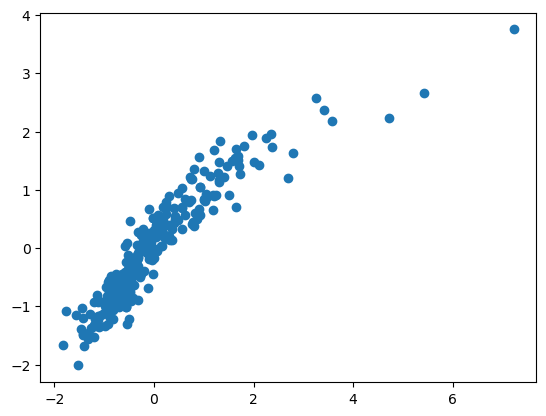

In [50]:
# plot the predictions
plt.scatter(y_test, y_pred)
plt.show()

In [51]:
# use the trained model to make predictions
y_pred = reg.predict(X_test)

# fit the model
reg = LinearRegression().fit(X_train, y_train)

In [52]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2713299749147539
Mean Squared Error: 0.19459517327649647
Root Mean Squared Error: 0.4411294291661989


In [53]:
# reg score
reg.score(X_test, y_test)

0.8398879321595911

In [54]:
# how many columns are in the dataframe
len(df.columns)

72

In [55]:
len(y_pred)

292

In [56]:
# how many values are there in X_test
len(X_test)

292

## make predictions

In [57]:
# load the testing data for prediction
df_test = pd.read_csv('data/test.csv')

In [58]:
df_test.shape

(1459, 80)

In [59]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [60]:
# display only the columns with missing values
df_test.isna().sum()[df_test.isna().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64